In [1]:
from partition import *

import numpy as np
import math

In [2]:
def set_ax(ax1, ax2):
    ax1.legend(loc = 'upper right')
    ax1.set_xticks(x)
    ax1.set_title("Discrete Power-law Distr");
    ax1.set_xlabel("Class label")
    ax1.set_ylabel("Proportion")

    ax2.legend(loc = 'upper right')
    ax2.set_xticks(x)
    ax2.set_title("Bernoulli-Uniform Distr");
    ax2.set_xlabel("Class label")
    ax2.set_ylabel("Proportion");
client=0

s=0.25
y_zp = [0.14358, 0.12074, 0.1091, 0.10153, 0.09602, 0.09174, 0.08827, 0.08538, 0.0829, 0.08074] 	 sum = 1.00 	 cv = 0.18744 	 mmr = 1.778
y_bu = [0.29908, 0.07788, 0.07788, 0.07788, 0.07788, 0.07788, 0.07788, 0.07788, 0.07788, 0.07788] 	 sum = 1.00 	 cv = 0.66360 	 mmr = 3.840
s=0.5
y_zp = [0.19916, 0.14083, 0.11499, 0.09958, 0.08907, 0.08131, 0.07528, 0.07041, 0.06639, 0.06298] 	 sum = 1.00 	 cv = 0.40225 	 mmr = 3.162
y_bu = [0.45412, 0.06065, 0.06065, 0.06065, 0.06065, 0.06065, 0.06065, 0.06065, 0.06065, 0.06065] 	 sum = 1.00 	 cv = 1.18045 	 mmr = 7.488
s=1
y_zp = [0.34142, 0.17071, 0.11381, 0.08535, 0.06828, 0.0569, 0.04877, 0.04268, 0.03794, 0.03414] 	 sum = 1.00 	 cv = 0.89806 	 mmr = 10.001
y_bu = [0.66891, 0.03679, 0.03679, 0.03679, 0.03679, 0.03679, 0.03679, 0.03679, 0.03679, 0.03679] 	 sum = 1.00 	 cv = 1.89632 	 mmr = 18.182
s=2
y_zp = [0.64526, 0.16131, 0.0717, 0.04033, 0.02581, 0.01792, 0.01317, 0.01008, 0.00797, 0.00645] 	 sum = 1.00 	 cv = 1.87221 	 mmr = 100.040

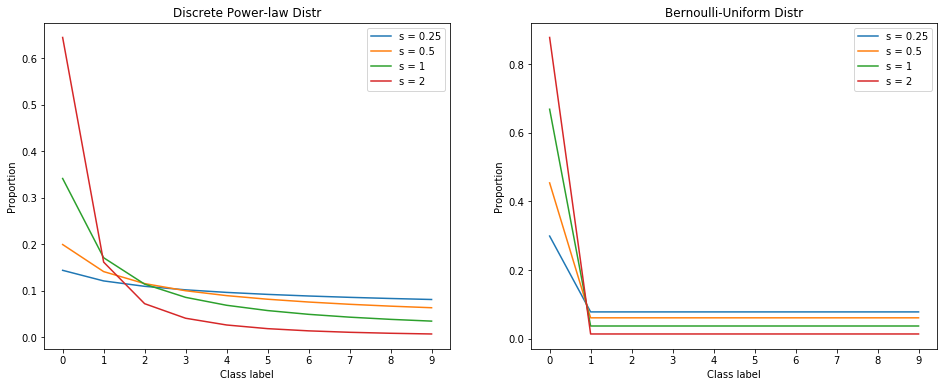

In [3]:
import matplotlib.pyplot as plt
N = 10

fig1 = plt.figure(figsize=(16,6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
x = list(range(N))

for s in [2**ex for ex in range(-2,2)]:
    y_zp = [round(zipf((i+client)%N+1, N, s), 5) for i in x]
    cv_zp = coef_var(y_zp)
    mmr_zp = maxmin_r(y_zp)
    y_bu = [round(bu((i+client)%N+1, N, s),   5) for i in x]
    cv_bu = coef_var(y_bu)
    mmr_bu = maxmin_r(y_bu)
    ax1.plot(x,y_zp, label=f's = {s}')
    ax2.plot(x,y_bu, label=f's = {s}')
    
    print(f"{s=}") 
    print(f"y_zp = {y_zp} \t sum = {sum(y_zp):.2f} \t cv = {cv_zp:.5f} \t mmr = {mmr_zp:.3f}")
    print(f"y_bu = {y_bu} \t sum = {sum(y_zp):.2f} \t cv = {cv_bu:.5f} \t mmr = {mmr_bu:.3f}")

set_ax(ax1,ax2)
#client+=1

In [4]:
unbal_param(10, 0.1, param='coef_var', distr='zipf')

0.13790419284074415

In [47]:
unbal_param(10, 1, param='dom_prop', distr='zipf', debug=True)

i: 0, s: 3.099, Obj: 0.847, err: 0.153, d: 0.314
i: 1, s: 4.376, Obj: 0.943, err: 0.057, d: 0.120
i: 2, s: 5.694, Obj: 0.979, err: 0.021, d: 0.043
i: 3, s: 7.058, Obj: 0.992, err: 0.008, d: 0.016
i: 4, s: 8.455, Obj: 0.997, err: 0.003, d: 0.006
i: 5, s: 9.871, Obj: 0.999, err: 0.001, d: 0.002
i: 6, s: 11.298, Obj: 1.000, err: 0.000, d: 0.001
i: 7, s: 12.732, Obj: 1.000, err: 0.000, d: 0.000
i: 8, s: 14.170, Obj: 1.000, err: 0.000, d: 0.000
i: 9, s: 15.610, Obj: 1.000, err: 0.000, d: 0.000
i: 10, s: 17.052, Obj: 1.000, err: 0.000, d: 0.000
i: 11, s: 18.493, Obj: 1.000, err: 0.000, d: 0.000
i: 12, s: 19.936, Obj: 1.000, err: 0.000, d: 0.000


19.935621581148606

[[1. 1. 1. 1. 1.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


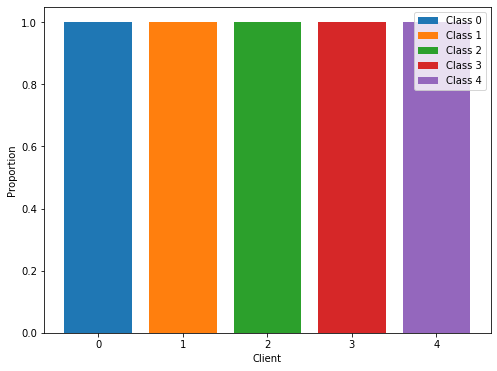

In [50]:
N = 5
s = 25
Y = np.zeros((N,N))
x = np.array(list(range(N)))
fig1 = plt.figure(figsize = (8,6))
ax1 = fig1.add_subplot(1,1,1)
row = np.zeros(x.shape)
for client in range(N): 
    yclient = np.array([zipf((i-client)%N+1, N, s) for i in x])
    Y[client] = yclient
    row += yclient
    ax1.bar(x,row, zorder = N - client, label=f'Class {client}')

ax1.set_xticks(x)
ax1.set_xlabel("Client")
ax1.set_ylabel("Proportion")
ax1.legend(loc="upper right")
print(Y.sum(axis = 0, keepdims = True))
print(Y.sum(axis = 1, keepdims = True))


